                                                                                                    Submitted by : Vivek Raju

In [223]:
#Import libraries
import pandas as pd
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [224]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None, names=unames, engine='python')

In [225]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None, names=rnames, engine='python')

In [226]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None, names=mnames, engine='python')

In [227]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [228]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [229]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [230]:
movies_reshaped = \
(movies.set_index(movies.columns.drop('genres',1).tolist())
   .genres.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'genres'})
   .loc[:, movies.columns]
)

In [231]:
movies_reshaped[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation
1,1,Toy Story (1995),Children's
2,1,Toy Story (1995),Comedy
3,2,Jumanji (1995),Adventure
4,2,Jumanji (1995),Children's


In [232]:
data = pd.merge(pd.merge(ratings, users), movies_reshaped)


In [233]:
data.head(1)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama


In [234]:
aggregate_rating_by_genre = data.pivot_table('rating', index = 'genres', aggfunc = 'mean')

# An aggregate of the movie ratings for each genre


In [235]:
aggregate_rating_by_genre

,rating
genres,
Action,3.491185
Adventure,3.477257
Animation,3.684868
Children's,3.422035
Comedy,3.522099
Crime,3.708679
Documentary,3.933123
Drama,3.766332
Fantasy,3.447371


In [236]:
data_women = data.loc[data['gender'] == 'F']

In [237]:
data_women[:20]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
19,59,1193,4,977934292,F,50,1,55413,One Flew Over the Cuckoo's Nest (1975),Drama
20,62,1193,4,977968584,F,35,3,98105,One Flew Over the Cuckoo's Nest (1975),Drama
22,81,1193,5,977785864,F,25,0,60640,One Flew Over the Cuckoo's Nest (1975),Drama
23,88,1193,5,977694161,F,45,1,02476,One Flew Over the Cuckoo's Nest (1975),Drama
24,89,1193,5,977683596,F,56,9,85749,One Flew Over the Cuckoo's Nest (1975),Drama
26,96,1193,3,977621789,F,25,16,78028,One Flew Over the Cuckoo's Nest (1975),Drama


In [238]:
 data_men = data.loc[data['gender'] == 'M']

In [239]:
data_men[:20]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama
10,39,1193,5,978043535,M,18,4,61820,One Flew Over the Cuckoo's Nest (1975),Drama
11,42,1193,3,978038981,M,25,8,24502,One Flew Over the Cuckoo's Nest (1975),Drama
12,44,1193,4,978018995,M,45,17,98052,One Flew Over the Cuckoo's Nest (1975),Drama
13,47,1193,4,977978345,M,18,4,94305,One Flew Over the Cuckoo's Nest (1975),Drama


In [240]:
aggregate_rating_by_genre_female = data_women.pivot_table('rating', index = 'genres', aggfunc = 'mean')

# The top 5 highest ranked genre by women.


In [241]:
aggregate_rating_by_genre_female.sort_values(by = 'rating', ascending=False)[:5]

,rating
genres,
Film-Noir,4.018087
Documentary,3.946392
War,3.893138
Musical,3.809108
Drama,3.765662


In [242]:
aggregate_rating_by_genre_male = data_men.pivot_table('rating', index = 'genres', aggfunc = 'mean')

In [243]:
aggregate_rating_by_genre_male

,rating
genres,
Action,3.491386
Adventure,3.468125
Animation,3.661335
Children's,3.358961
Comedy,3.503667
Crime,3.713720
Documentary,3.928811
Drama,3.766589
Fantasy,3.426603


# The top 5 highest ranked genre by men.


In [244]:
aggregate_rating_by_genre_male.sort_values(by = 'rating', ascending=False)[:5]

,rating
genres,
Film-Noir,4.092254
Documentary,3.928811
War,3.893375
Drama,3.766589
Crime,3.713720


In [245]:
data_jumanji = data.loc[data['title'] == 'Jumanji (1995)']

In [246]:
data_jumanji[:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
972489,10,2,5,979168267,F,35,1,95370,Jumanji (1995),Adventure
972490,10,2,5,979168267,F,35,1,95370,Jumanji (1995),Children's
972491,10,2,5,979168267,F,35,1,95370,Jumanji (1995),Fantasy
972492,13,2,3,978202563,M,45,1,93304,Jumanji (1995),Adventure
972493,13,2,3,978202563,M,45,1,93304,Jumanji (1995),Children's


In [247]:
data_jumanji

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
972489,10,2,5,979168267,F,35,1,95370,Jumanji (1995),Adventure
972490,10,2,5,979168267,F,35,1,95370,Jumanji (1995),Children's
972491,10,2,5,979168267,F,35,1,95370,Jumanji (1995),Fantasy
972492,13,2,3,978202563,M,45,1,93304,Jumanji (1995),Adventure
972493,13,2,3,978202563,M,45,1,93304,Jumanji (1995),Children's
972494,13,2,3,978202563,M,45,1,93304,Jumanji (1995),Fantasy
972495,18,2,2,978152541,F,18,3,95825,Jumanji (1995),Adventure
972496,18,2,2,978152541,F,18,3,95825,Jumanji (1995),Children's
972497,18,2,2,978152541,F,18,3,95825,Jumanji (1995),Fantasy
972498,23,2,2,978461604,M,35,0,90049,Jumanji (1995),Adventure


In [248]:
aggregate_rating_Jumanji_by_age = data_jumanji.pivot_table('rating', index = 'age', aggfunc = 'mean')

# Breakdown of Jumanji's ratings by age.

In [249]:
aggregate_rating_Jumanji_by_age

,rating
age,
1,3.388889
18,2.993506
25,3.145594
35,3.307692
45,3.480769
50,3.355556
56,3.500000


#  A function that given a user id and movie id , returns a list of user ids for other users that rated the movie identified by the provided movie id with the same score.


In [250]:
data = pd.merge(pd.merge(ratings, users), movies_reshaped)

In [251]:
def identify(user_id, movie_id):
    rating = data.loc[(data['movie_id'] == movie_id) & (data['user_id'] == user_id)]['rating']
    if rating.count() == 0:
        return 0
    data_userid = data[data['movie_id'] == movie_id].pivot_table('rating', index='user_id')
    data_userid = data_userid[data_userid['rating'] == rating.values[0]]
    data_userid = data_userid.drop(user_id).index.values
    
    
    return list(data_userid)

In [255]:
identify(12,1193)

[15,
 18,
 44,
 47,
 48,
 49,
 59,
 62,
 80,
 136,
 139,
 146,
 151,
 178,
 192,
 196,
 202,
 216,
 224,
 225,
 227,
 230,
 231,
 242,
 245,
 264,
 272,
 285,
 291,
 294,
 295,
 308,
 309,
 312,
 317,
 318,
 329,
 331,
 349,
 353,
 366,
 383,
 390,
 392,
 393,
 402,
 444,
 450,
 456,
 457,
 460,
 464,
 467,
 479,
 509,
 513,
 531,
 533,
 554,
 573,
 585,
 587,
 601,
 620,
 624,
 641,
 651,
 656,
 660,
 688,
 690,
 691,
 698,
 699,
 702,
 719,
 721,
 729,
 733,
 748,
 749,
 755,
 765,
 773,
 779,
 792,
 793,
 796,
 810,
 816,
 829,
 844,
 850,
 862,
 864,
 867,
 868,
 903,
 904,
 907,
 912,
 929,
 934,
 948,
 958,
 960,
 963,
 984,
 1003,
 1014,
 1032,
 1078,
 1090,
 1115,
 1119,
 1120,
 1126,
 1128,
 1137,
 1142,
 1150,
 1162,
 1169,
 1174,
 1204,
 1209,
 1226,
 1231,
 1238,
 1242,
 1248,
 1249,
 1265,
 1266,
 1274,
 1277,
 1291,
 1293,
 1298,
 1301,
 1317,
 1335,
 1339,
 1365,
 1374,
 1392,
 1396,
 1413,
 1415,
 1416,
 1427,
 1432,
 1442,
 1463,
 1483,
 1489,
 1495,
 1547,
 1556,
 156

In [256]:
data[:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [257]:
count_rating_by_zip = data.pivot_table('movie_id', index = 'zip', aggfunc = 'count')

In [258]:
count_rating_by_zip.sort_values(by = 'movie_id', ascending = False)

,movie_id
zip,
94110,7814
98103,6723
60640,6485
95616,6479
02138,5803
55408,5682
97401,5437
48135,5418
10025,5359


In [259]:
data.loc[data['zip'] == '07405'].count()

user_id       29
movie_id      29
rating        29
timestamp     29
gender        29
age           29
occupation    29
zip           29
title         29
genres        29
dtype: int64

In [260]:
zip_data = data.pivot_table(index = ['zip'], columns = ['gender'], values = 'movie_id', aggfunc = 'count')

In [261]:
zip_data['diff'] = zip_data['F'] - zip_data['M']

In [262]:
zip_data = zip_data.fillna(0)

In [263]:
zip_data = zip_data.sort_values(by = 'diff', ascending = False)

In [264]:
zip_data_top = zip_data.head(10)

In [265]:
zip_data_top

gender,F,M,diff
zip,,,
02138,3988.0,1815.0,2173.0
84108,2023.0,76.0,1947.0
28270,1813.0,53.0,1760.0
14850,1687.0,97.0,1590.0
32603,1691.0,132.0,1559.0
02148,1713.0,306.0,1407.0
97401,3417.0,2020.0,1397.0
19806,1629.0,240.0,1389.0
94044,2120.0,780.0,1340.0


In [266]:
zip_data_bottom = zip_data.tail(10)

In [267]:
zip_data_bottom

gender,F,M,diff
zip,,,
10024,980.0,4262.0,-3282.0
92122,171.0,3727.0,-3556.0
10025,853.0,4506.0,-3653.0
53706,578.0,4286.0,-3708.0
02139,528.0,4278.0,-3750.0
98133,81.0,3908.0,-3827.0
48197,230.0,4103.0,-3873.0
48135,582.0,4836.0,-4254.0
55112,248.0,4539.0,-4291.0


In [268]:
zip_data_by_gender = zip_data_top.append(zip_data_bottom)

In [269]:
zip_data_by_gender

gender,F,M,diff
zip,,,
02138,3988.0,1815.0,2173.0
84108,2023.0,76.0,1947.0
28270,1813.0,53.0,1760.0
14850,1687.0,97.0,1590.0
32603,1691.0,132.0,1559.0
02148,1713.0,306.0,1407.0
97401,3417.0,2020.0,1397.0
19806,1629.0,240.0,1389.0
94044,2120.0,780.0,1340.0


# Male vs Female count of ratings in areas that rated movies most.

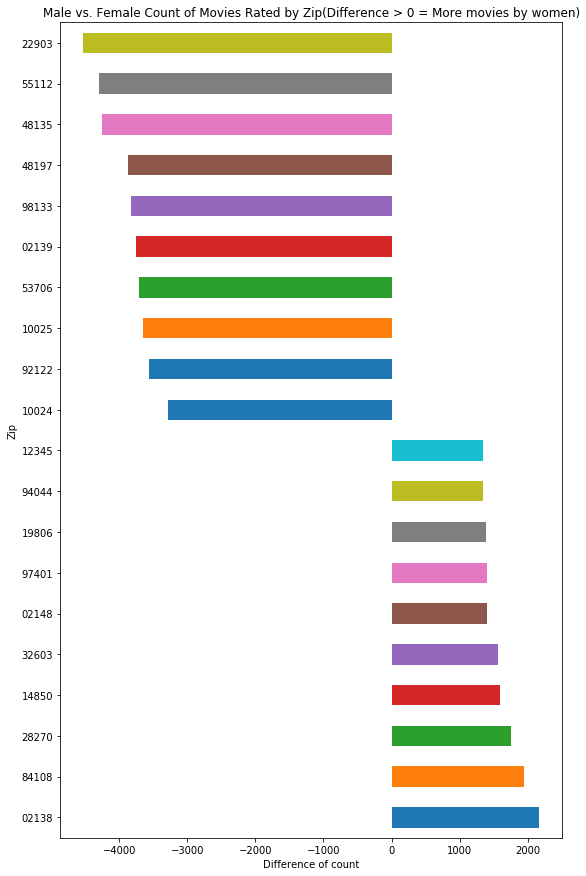

In [272]:
zip_data_by_gender['diff'].plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Count of Movies Rated by Zip(Difference > 0 = More movies by women)')
plt.ylabel('Zip')
plt.xlabel('Difference of count');

22903 is the area where there is a large difference in number of ratings for movies by women when compared to men. 02138 meanwhile is the area where there is a large difference in number of ratings for movies by men when compared to women. This could in turn hint towards the popular movie going gender in the two areas.